In [1]:
%matplotlib inline

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
import tensorflow.keras

In [21]:
RANDOM_STATE = 42

# 08 Intro to NN Lecture Demos

## MNIST Digits

### Load  data

In [6]:
digits = load_digits()
attributes, labels = digits.data, digits.target
attributes.shape, labels.shape

((1797, 64), (1797,))

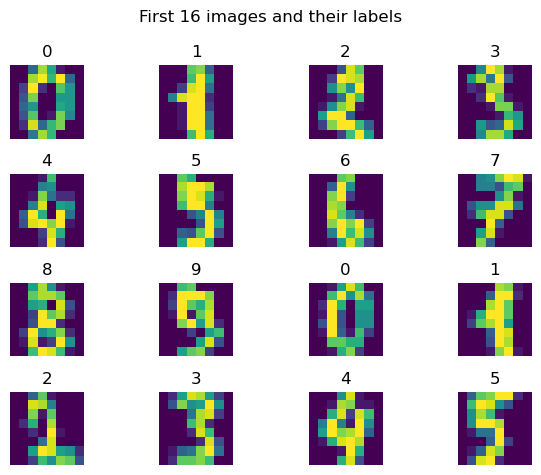

In [20]:
fig, axs = plt.subplots(4, 4)

for i, ax in enumerate(axs.ravel()):
    ax.imshow(attributes[i].reshape(8, 8))
    ax.set_title(labels[i])
    ax.axis('off')

plt.suptitle('First 16 images and their labels')
plt.tight_layout()
plt.show()

### Scaled data

In [67]:
scaler = MinMaxScaler()
attributes_scaled = scaler.fit_transform(attributes)

In [68]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(
    attributes_scaled, labels, test_size = 200, shuffle=True, stratify=labels)

attributes_train.shape, attributes_test.shape, labels_train.shape, labels_test.shape

((1597, 64), (200, 64), (1597,), (200,))

In [72]:
params = [
    ('identity', 'sgd'),
    ('logistic', 'sgd'),
    ('relu', 'sgd'),
    ('relu', 'adam'),
]


benchmark = []
for (activation, solver) in params:
    model = MLPClassifier(
        hidden_layer_sizes=(16, 16),
        activation=activation,  # ['identity', 'logistic', 'relu', 'softmax', 'tanh']
        solver=solver,
        shuffle=True,
        random_state=RANDOM_STATE,
        max_iter=500,
        tol=0.0001,
    )

    model.fit(attributes_train, labels_train)
    score_train = model.score(attributes_train, labels_train)
    score_test = model.score(attributes_test, labels_test)
    benchmark.append([activation, solver, score_train, score_test])
    
benchmark = pd.DataFrame(benchmark, columns=['activation', 'solver', 'score_train', 'score_test'])

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
benchmark.round(3)

,activation,solver,score_train,score_test
0,identity,sgd,0.960,0.950
1,logistic,sgd,0.100,0.095
2,relu,sgd,0.946,0.940
3,relu,adam,1.000,0.980


### Not-scaled data

In [75]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(
    attributes, labels, test_size = 200, shuffle=True, stratify=labels)

attributes_train.shape, attributes_test.shape, labels_train.shape, labels_test.shape


params = [
    ('identity', 'sgd'),
    ('logistic', 'sgd'),
    ('relu', 'sgd'),
    ('relu', 'adam'),
]

benchmark = []
for (activation, solver) in params:
    model = MLPClassifier(
        hidden_layer_sizes=(16, 16),
        activation=activation,  # ['identity', 'logistic', 'relu', 'softmax', 'tanh']
        solver=solver,
        shuffle=True,
        random_state=RANDOM_STATE,
        max_iter=500,
        tol=0.0001,
    )

    model.fit(attributes_train, labels_train)
    score_train = model.score(attributes_train, labels_train)
    score_test = model.score(attributes_test, labels_test)
    benchmark.append([activation, solver, score_train, score_test])
    
benchmark = pd.DataFrame(benchmark, columns=['activation', 'solver', 'score_train', 'score_test'])

benchmark.round(3)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,activation,solver,score_train,score_test
0,identity,sgd,0.999,0.945
1,logistic,sgd,0.691,0.715
2,relu,sgd,0.997,0.955
3,relu,adam,0.999,0.940


Scaling matters for Sigmoid.

### Updates

In [76]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(
    attributes_scaled, labels, test_size = 200, shuffle=True, stratify=labels)

attributes_train.shape, attributes_test.shape, labels_train.shape, labels_test.shape

((1597, 64), (200, 64), (1597,), (200,))

In [77]:
params = [
    ('relu', 'adam'),
]

def compare_hparams(params):

    benchmark = []
    for (activation, solver) in params:
        model = MLPClassifier(
            hidden_layer_sizes=(16, 16),
            activation=activation,  # ['identity', 'logistic', 'relu', 'softmax', 'tanh']
            solver=solver,
            shuffle=True,
            random_state=RANDOM_STATE,
            max_iter=200,
            tol=0.0001,
            verbose=True,
        )

        model.fit(attributes_train, labels_train)
        score_train = model.score(attributes_train, labels_train)
        score_test = model.score(attributes_test, labels_test)
        benchmark.append([activation, solver, score_train, score_test])

    benchmark = pd.DataFrame(benchmark, columns=['activation', 'solver', 'score_train', 'score_test'])

    print(benchmark.round(3))
    
compare_hparams(params)

Iteration 1, loss = 2.33712179
Iteration 2, loss = 2.29129080
Iteration 3, loss = 2.24985061
Iteration 4, loss = 2.20767378
Iteration 5, loss = 2.15852299
Iteration 6, loss = 2.09935339
Iteration 7, loss = 2.03469031
Iteration 8, loss = 1.96339879
Iteration 9, loss = 1.88416030
Iteration 10, loss = 1.80305905
Iteration 11, loss = 1.71588636
Iteration 12, loss = 1.62526704
Iteration 13, loss = 1.53161730
Iteration 14, loss = 1.43713180
Iteration 15, loss = 1.34494112
Iteration 16, loss = 1.25397453
Iteration 17, loss = 1.16537224
Iteration 18, loss = 1.08067645
Iteration 19, loss = 0.99943332
Iteration 20, loss = 0.92628748
Iteration 21, loss = 0.86161467
Iteration 22, loss = 0.80392227
Iteration 23, loss = 0.75287666
Iteration 24, loss = 0.70858022
Iteration 25, loss = 0.66812633
Iteration 26, loss = 0.63157648
Iteration 27, loss = 0.59993319
Iteration 28, loss = 0.57102589
Iteration 29, loss = 0.54354268
Iteration 30, loss = 0.51970874
Iteration 31, loss = 0.49715364
Iteration 32, los

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Coeffs

In [81]:
for el in model.coefs_:
    print(el.shape)

(64, 16)
(16, 16)
(16, 10)


In [84]:
np.sum([el.size for el in model.coefs_])

1440